<a href="https://colab.research.google.com/github/kslote1/Data-Driven-Dynamics/blob/main/chapter_one/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Moore-Penrose Pseudo-Inverse in Regression Problems

In regression analysis, the goal is often to find the best-fit parameters for a model that maps input variables to an output variable. The Moore-Penrose pseudo-inverse provides a way to compute these parameters, especially when the system of equations does not have a unique solution or when the number of equations is different from the number of unknowns.

## Mathematical Background

Consider a linear model:

$$y = X\beta + \epsilon$$

where:
- $y$ is the dependent variable (vector of observed values),
- $X$ is the matrix of independent variables,
- $\beta$ is the vector of parameters we want to estimate,
- $\epsilon$ is the error term.

Our goal is to find an estimate of $\beta$ that minimizes the error term. In a typical linear regression scenario, this is often done by minimizing the sum of squared errors:

$\min_{\beta} \| y - X\beta \|^2$

When $X$ is not invertible or does not have full column rank, the ordinary least squares solution, given by $\beta = (X^TX)^{-1}X^Ty$, cannot be used. This is where the Moore-Penrose pseudo-inverse comes into play.

## Moore-Penrose Pseudo-Inverse

The Moore-Penrose pseudo-inverse of a matrix $A$, denoted as $A^+$, provides a least-squares solution to a system of linear equations.

The pseudo-inverse is defined as:

$A^+ = \lim_{\delta \to 0} (A^TA + \delta I)^{-1}A^T$

For our regression problem, $A$ corresponds to the matrix $X$. Therefore, the estimate of $\beta$ using the Moore-Penrose pseudo-inverse is:

$$\hat{\beta} = X^+y$$

where $X^+$ is the pseudo-inverse of $X$.

## Solution with Moore-Penrose Pseudo-Inverse

The solution with the pseudo-inverse ensures that the sum of squared differences between the observed values and the values predicted by the linear model is minimized. In mathematical terms, this solution is:

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

if $X^TX$ is invertible, otherwise:

$$\hat{\beta} = X^+y$$

## Demo

Let's pull the diabetes data set and see how the moore-penrose pseudo-inverse is used to perform regression.

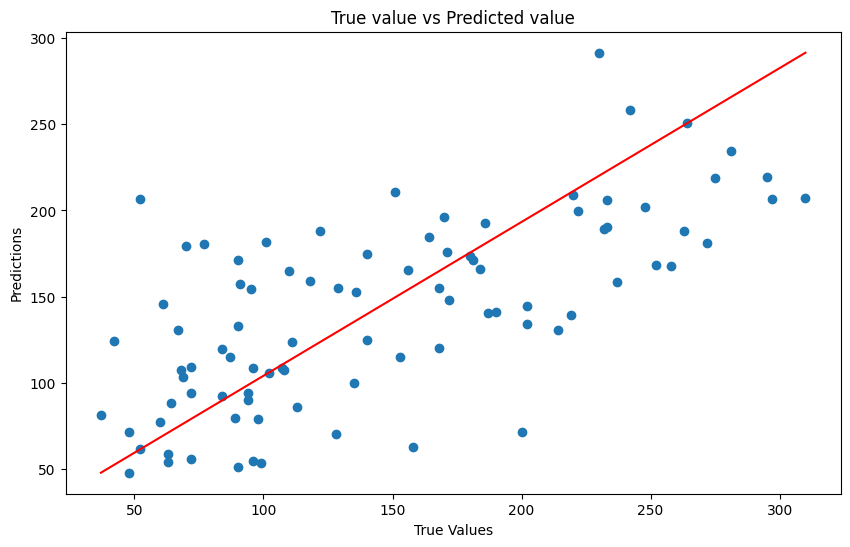

(2900.193628493482, 0.4526027629719195)

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load Diabetes housing dataset
diabetus_dataset = load_diabetes()
data = pd.DataFrame(diabetus_dataset.data, columns=diabetus_dataset.feature_names)
target = pd.DataFrame(diabetus_dataset.target, columns=["MEDV"])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test.values), max(y_test.values)], [min(y_pred), max(y_pred)], color='red') # Regression line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True value vs Predicted value')
plt.show()

mse, r2

# Regression with the Pseudo Inverse

Now let's compare this to the regression with the pseudo inverse

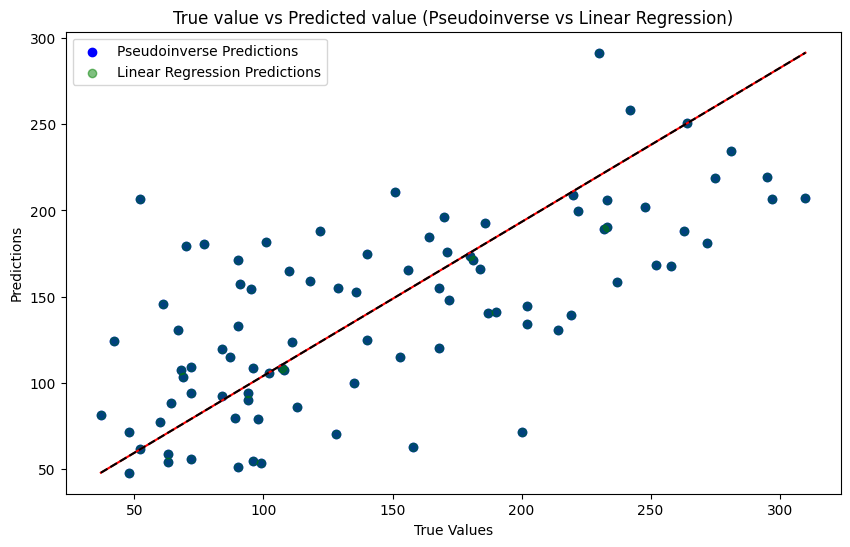

(2900.1936284934764,
 0.45260276297192037,
 2900.193628493482,
 0.4526027629719195)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Add a column of ones to X_train and X_test for the intercept term
X_train_with_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_with_intercept = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Step 2: Compute the pseudoinverse of the modified feature matrix
X_pseudo_inverse = np.linalg.pinv(X_train_with_intercept)

# Step 3: Compute the regression coefficients
weights = np.dot(X_pseudo_inverse, y_train)

# Step 4: Make predictions on the test set
y_pred_pseudo = np.dot(X_test_with_intercept, weights)

# Evaluate the model
mse_pseudo = mean_squared_error(y_test, y_pred_pseudo)
r2_pseudo = r2_score(y_test, y_pred_pseudo)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_pseudo, color='blue', label='Pseudoinverse Predictions')
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Linear Regression Predictions')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_pred_pseudo), max(y_pred_pseudo)], color='red') # Pseudoinverse Regression line
plt.plot([min(y_test.values), max(y_test.values)], [min(y_pred), max(y_pred)], color='black', linestyle='--') # Linear Regression line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True value vs Predicted value (Pseudoinverse vs Linear Regression)')
plt.legend()
plt.show()

mse_pseudo, r2_pseudo, mse, r2
